In [1]:
from eval import (
    Episode,
    Study,
    full_evaluation,
    plot_best_mae_box,
    plot_best_mae_diff_over_problem,
    plot_best_mae_over_time,
    plot_final_mae_box,
    plot_mae_over_time,
    plot_steps_to_convergence_box,
    plot_steps_to_threshold_box,
)


In [2]:
FIG_DIR = "figures/bo_vs_rl"


In [3]:
rl_sim = Study("data/bo_vs_rl/simulation/rl", runs="*problem_*", name="RL (Sim)")
bo_sim = Study("data/bo_vs_rl/simulation/bo", name="BO (Sim)")

rl_real = Study("data/bo_vs_rl/real/rl", runs="*problem_*", name="RL (Real)")
bo_real = Study("data/bo_vs_rl/real/bo", runs="*problem_*", name="BO (Real)")

rl_real_2 = Study("data/bo_vs_rl/real/rl", runs="20221117*_problem*", name="RL (RL vs. EI vs. UCB)")
bo_real_2 = Study("data/bo_vs_rl/real/bo", runs="20221117*_problem*", name="BO EI (RL vs. EI vs. UCB)")
bo_ucb_real_2 = Study("data/bo_vs_rl/real/bo_ucb", runs="20221117*_problem*", name="BO UCB (RL vs. EI vs. UCB)")


### Summary

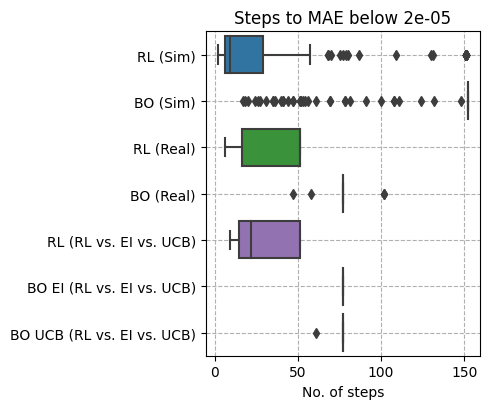

In [5]:
plot_steps_to_threshold_box(
    [rl_sim, bo_sim, rl_real, bo_real, rl_real_2, bo_real_2, bo_ucb_real_2],
    save_path=f"{FIG_DIR}/steps_to_target.pdf",
)


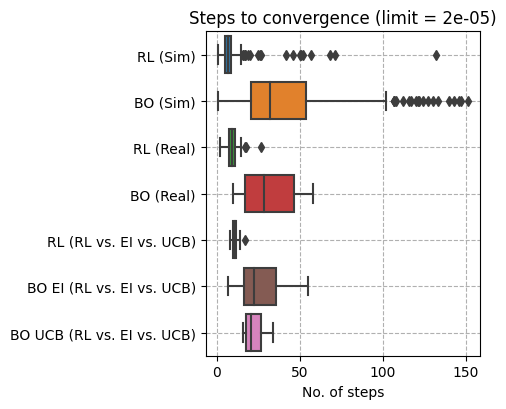

In [6]:
plot_steps_to_convergence_box(
    [rl_sim, bo_sim, rl_real, bo_real, rl_real_2, bo_real_2, bo_ucb_real_2],
    save_path=f"{FIG_DIR}/steps_to_convergence.pdf",
)


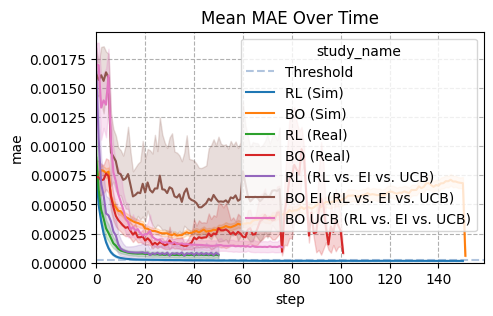

In [7]:
plot_mae_over_time(
    [rl_sim, bo_sim, rl_real, bo_real, rl_real_2, bo_real_2, bo_ucb_real_2],
    threshold=20e-6,
    save_path=f"{FIG_DIR}/mae_over_time.pdf",
)


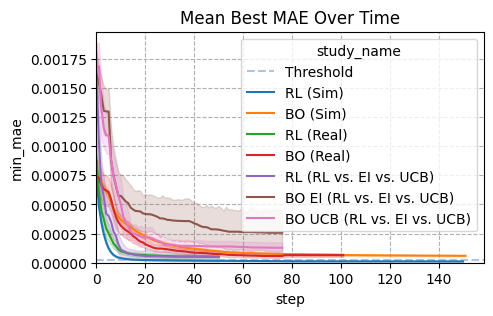

In [8]:
plot_best_mae_over_time(
    [rl_sim, bo_sim, rl_real, bo_real, rl_real_2, bo_real_2, bo_ucb_real_2],
    threshold=20e-6,
    save_path=f"{FIG_DIR}/best_mae_over_time.pdf",
)


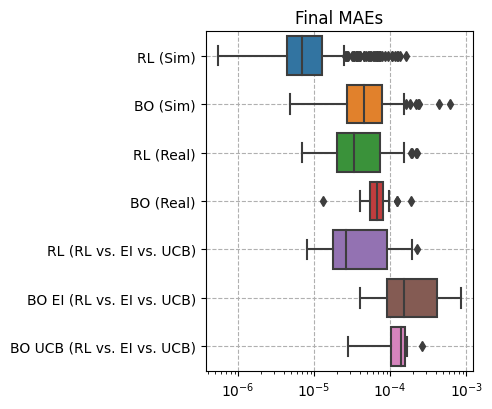

In [9]:
plot_final_mae_box(
    [rl_sim, bo_sim, rl_real, bo_real, rl_real_2, bo_real_2, bo_ucb_real_2],
    save_path=f"{FIG_DIR}/final_mae.pdf",
)


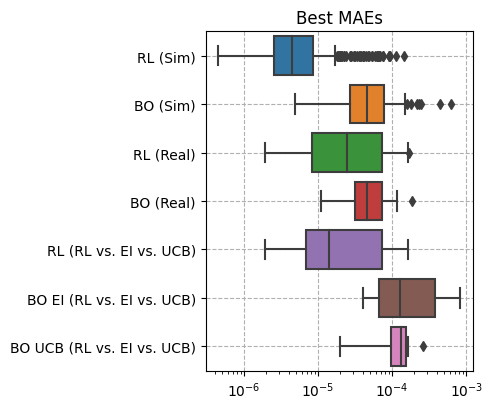

In [10]:
plot_best_mae_box(
    [rl_sim, bo_sim, rl_real, bo_real, rl_real_2, bo_real_2, bo_ucb_real_2],
    save_path=f"{FIG_DIR}/final_best_mae.pdf",
)


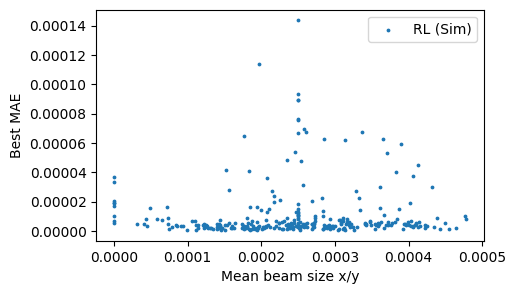

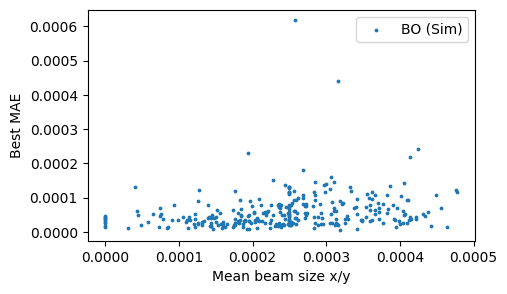

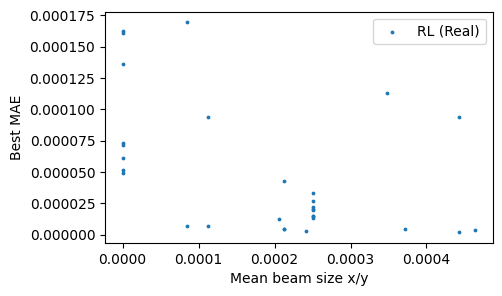

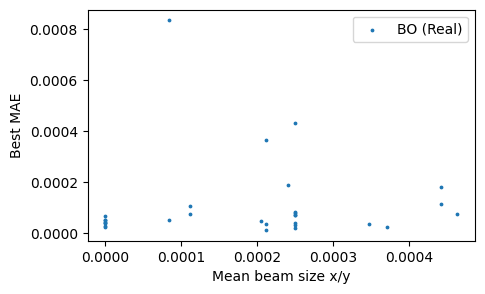

In [10]:
for study in [rl_sim, bo_sim, rl_real, bo_real]:
    study.plot_target_beam_size_mae_correlation()


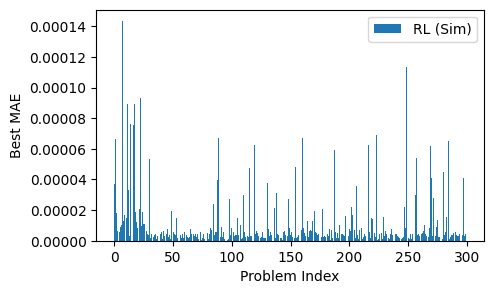

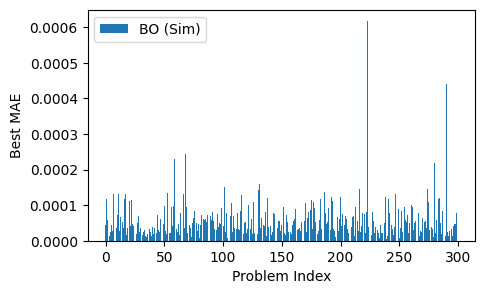

AssertionError: There are duplicate problems in this study.

In [13]:
for study in [rl_sim, bo_sim, rl_real, bo_real]:
    study.plot_best_mae_over_problem()


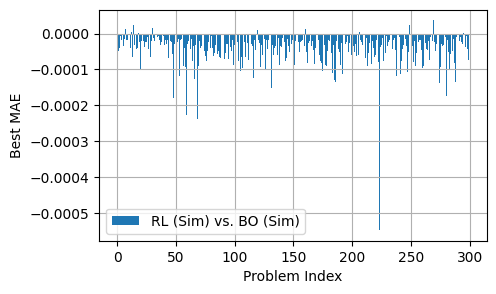

AssertionError: The problems in study 1 are note unique.

In [5]:
plot_best_mae_diff_over_problem(
    study_1=rl_sim,
    study_2=bo_sim,
)
plot_best_mae_diff_over_problem(
    study_1=rl_real,
    study_2=bo_real,
)


In [13]:
import numpy as np
import matplotlib.pyplot as plt


In [14]:
for episode in rl_real:
    actions = np.stack(episode["actions"])
    normalized = actions / [72, 72, 6.1782e-3, 72, 6.1782e-3]
    action_sizes = np.max(np.abs(normalized), axis=1)

    maes = get_maes(episode)

    plt.figure(figsize=(10, 3))
    plt.subplot(121)
    plt.title("Action Size")
    plt.plot(action_sizes)
    plt.ylim(0, 0.055)
    plt.subplot(122)
    plt.title("MAE")
    plt.plot(maes)
    plt.ylim(0, 0.0005)
    plt.show()


TypeError: 'int' object is not subscriptable

In [ ]:
1, 4


(1, 4)

In [ ]:
rl_real[1]["observations"][0]["target"]


array([0.    , 0.0005, 0.    , 0.    ], dtype=float32)

In [ ]:
rl_real[4]["observations"][0]["target"]


array([-0.001 ,  0.0005,  0.    ,  0.    ], dtype=float32)

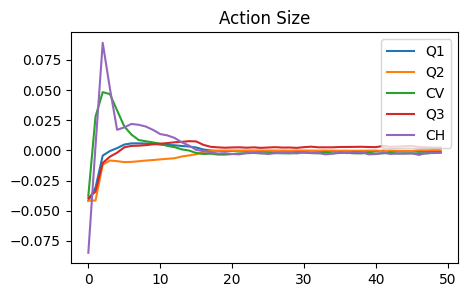

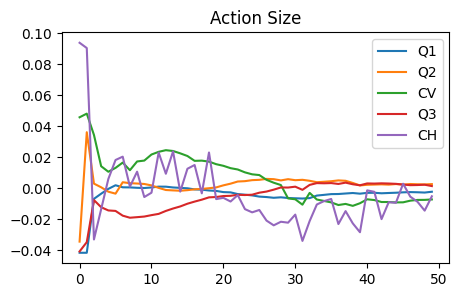

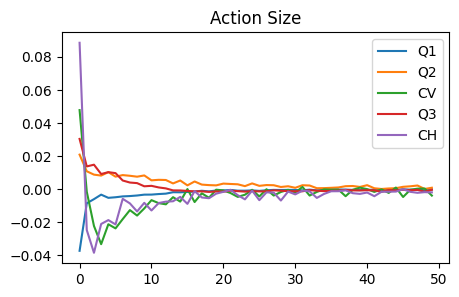

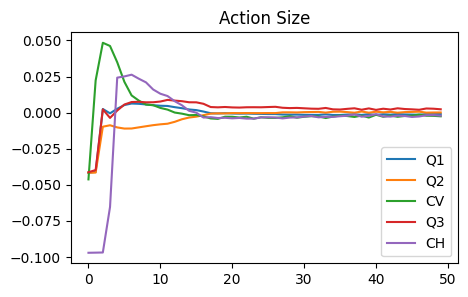

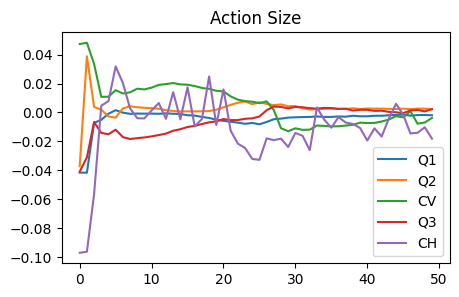

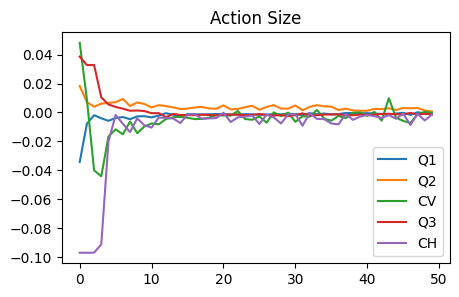

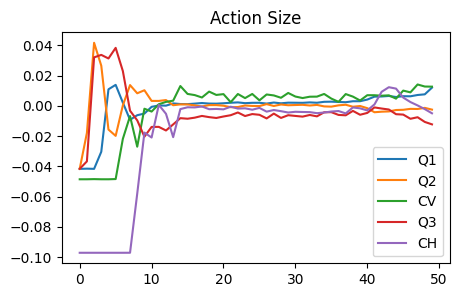

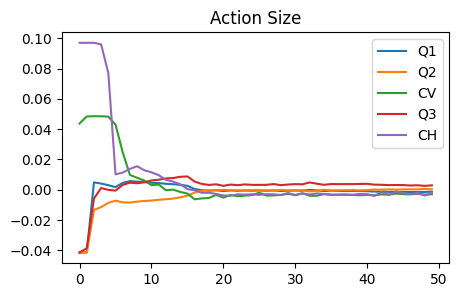

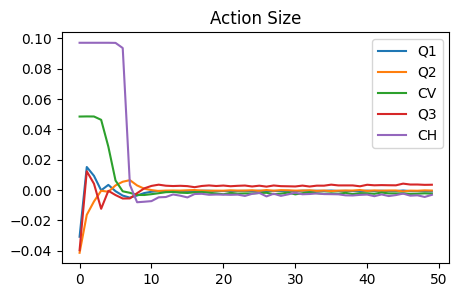

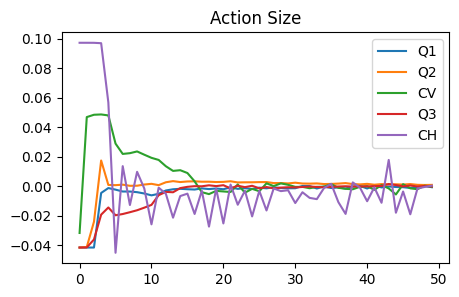

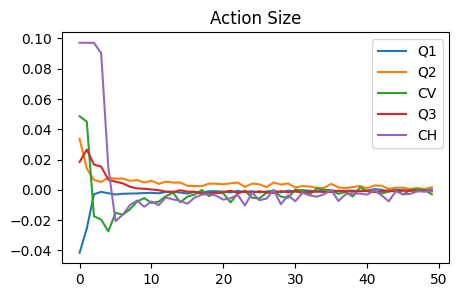

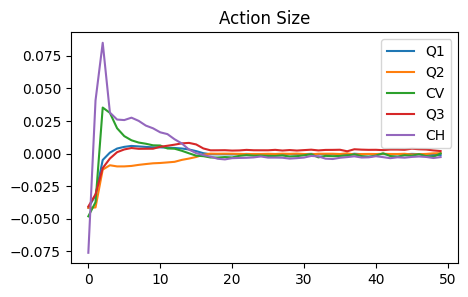

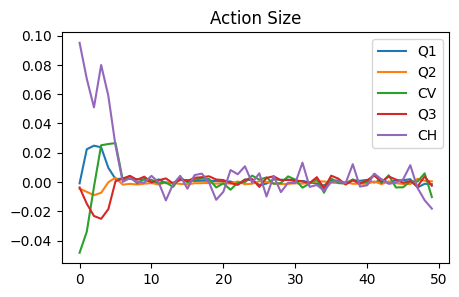

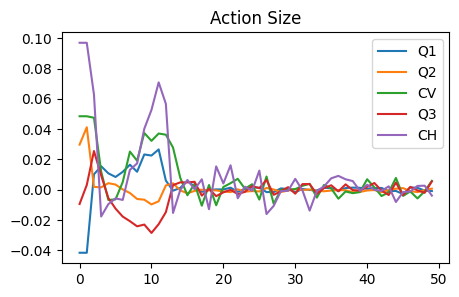

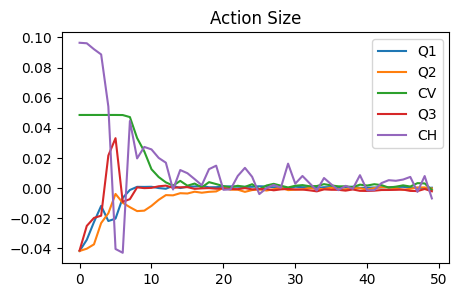

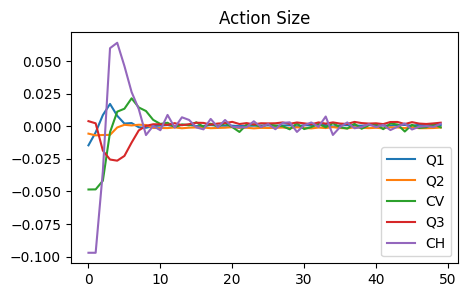

In [ ]:
for episode in rl_real:
    actions = np.stack(episode["actions"])
    normalized = actions / [72, 72, 6.1782e-3, 72, 6.1782e-3]
    normalized = normalized

    plt.figure(figsize=(5, 3))
    plt.title("Action Size")
    plt.plot(normalized[:, 0], label="Q1")
    plt.plot(normalized[:, 1], label="Q2")
    plt.plot(normalized[:, 2], label="CV")
    plt.plot(normalized[:, 3], label="Q3")
    plt.plot(normalized[:, 4], label="CH")
    plt.legend()
    plt.show()


In [ ]:
rl_real[0]["observations"][0]["beam"]


array([0.00035522, 0.00011841, 0.00010399, 0.00075537], dtype=float32)

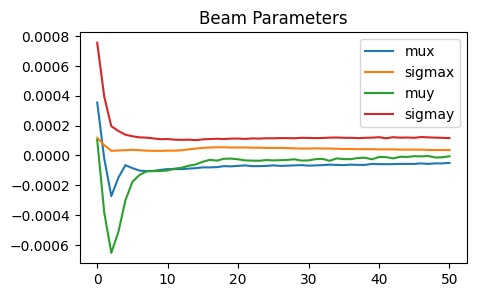

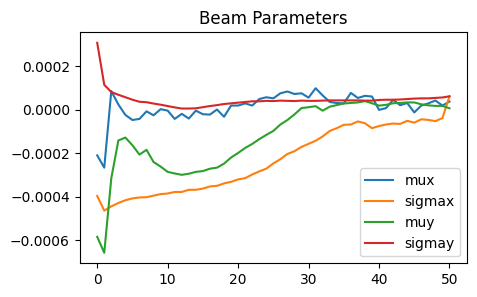

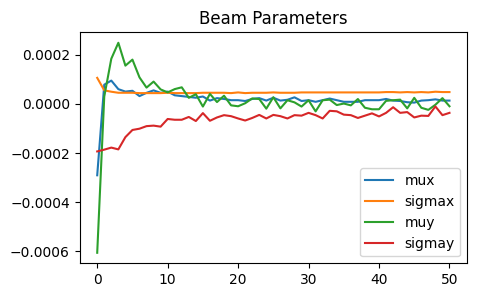

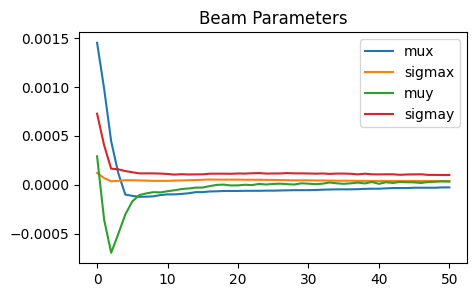

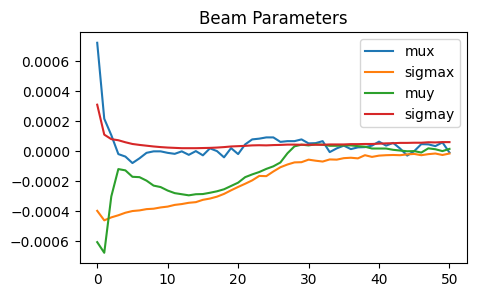

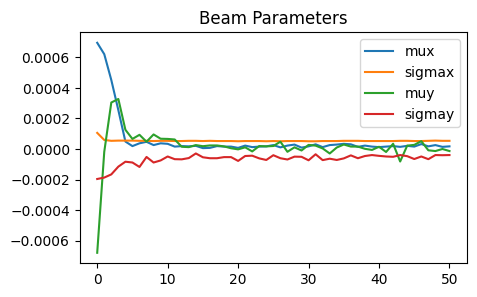

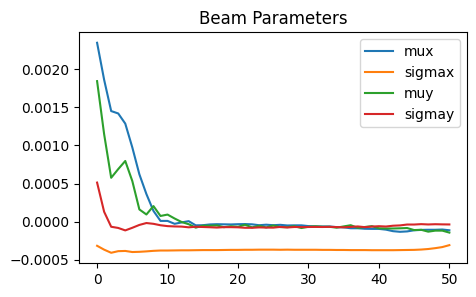

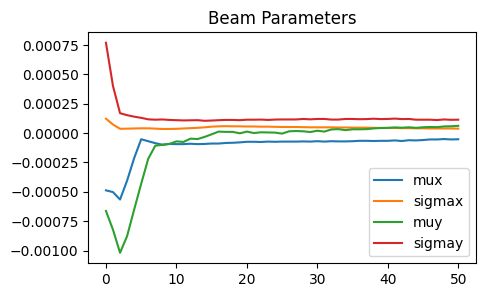

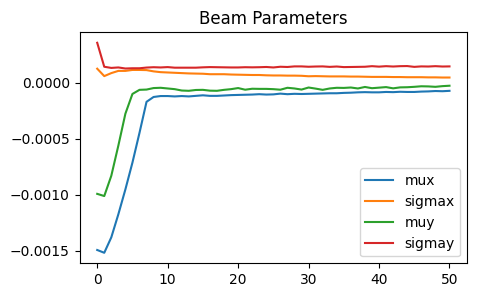

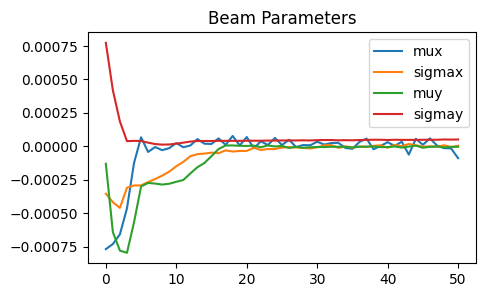

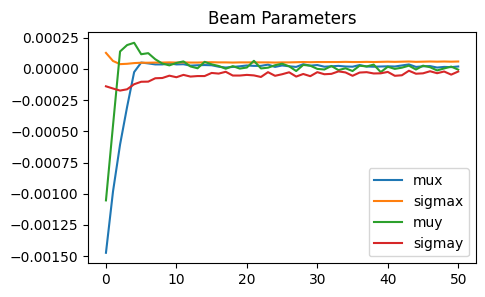

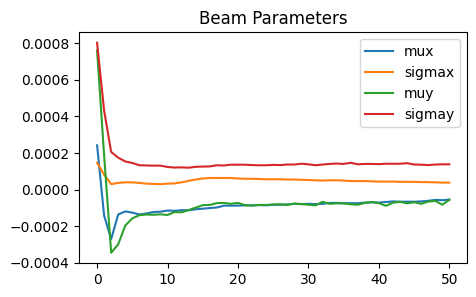

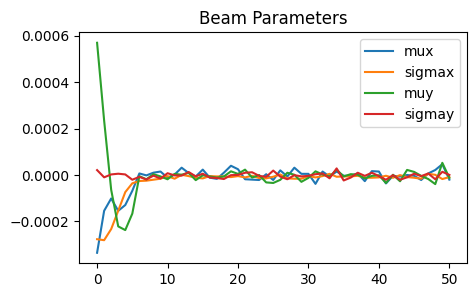

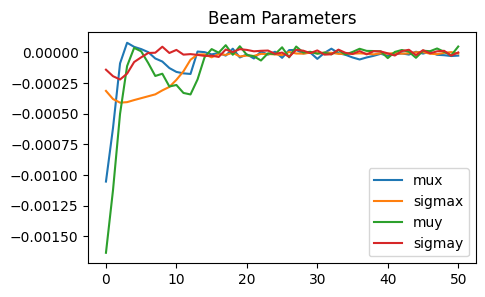

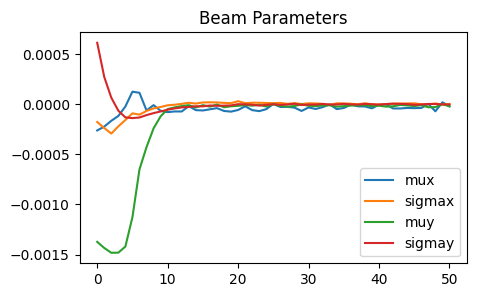

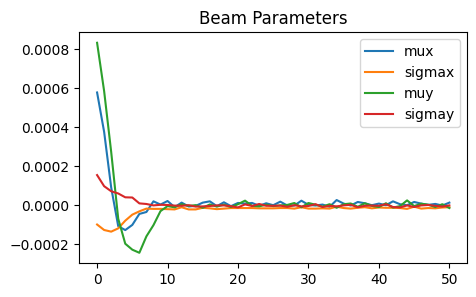

In [ ]:
for episode in rl_real:
    beams = np.stack([obs["beam"] for obs in episode["observations"]])
    targets = np.stack([obs["target"] for obs in episode["observations"]])

    diffs = beams - targets

    plt.figure(figsize=(5, 3))
    plt.title("Beam Parameters")
    plt.plot(diffs[:, 0], label="mux")
    plt.plot(diffs[:, 1], label="sigmax")
    plt.plot(diffs[:, 2], label="muy")
    plt.plot(diffs[:, 3], label="sigmay")
    plt.legend()
    plt.show()


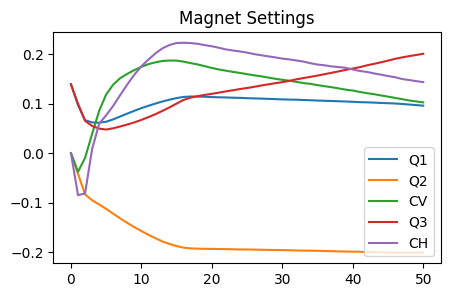

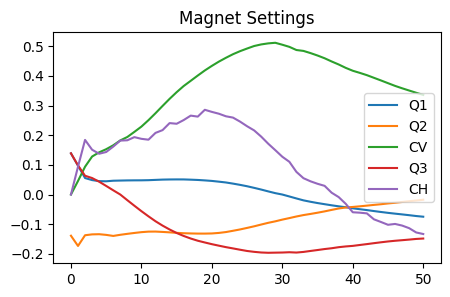

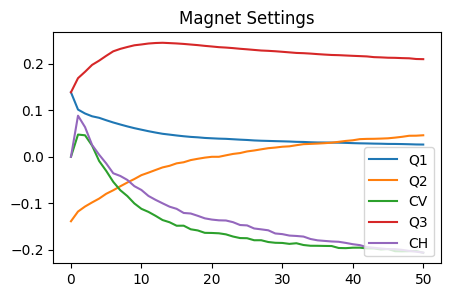

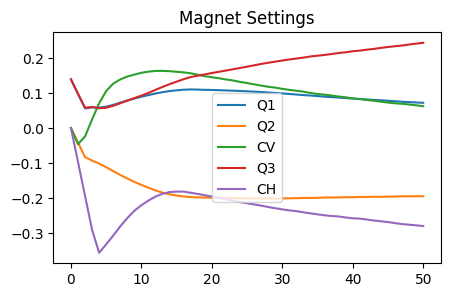

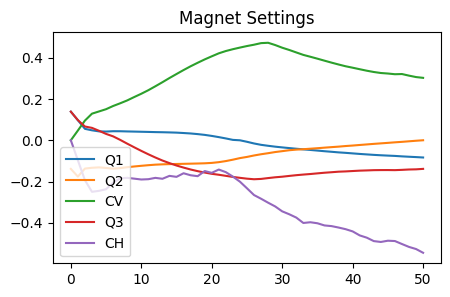

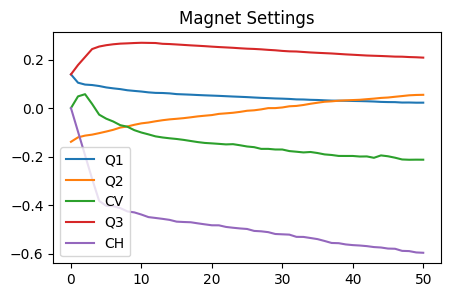

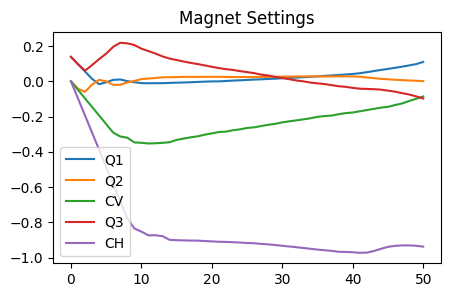

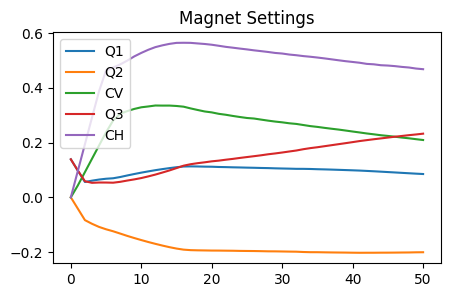

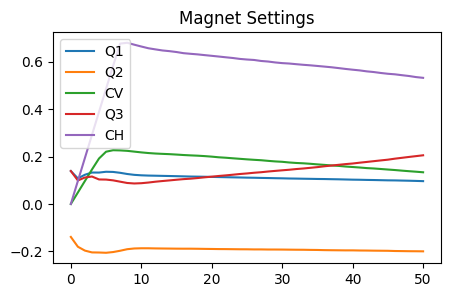

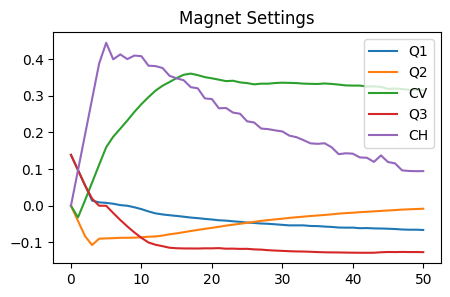

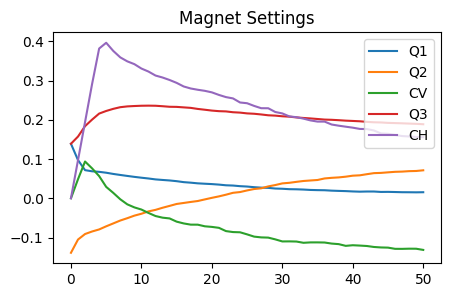

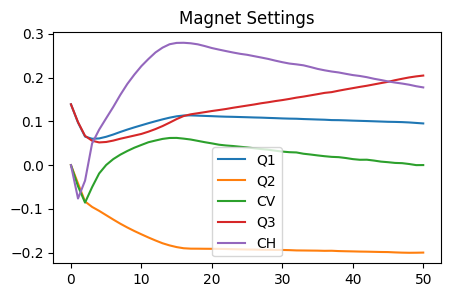

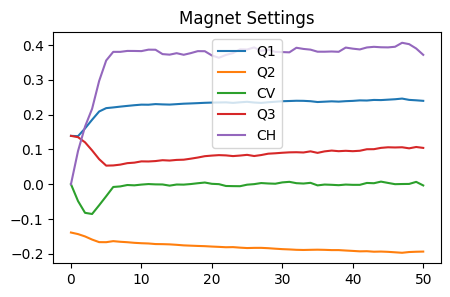

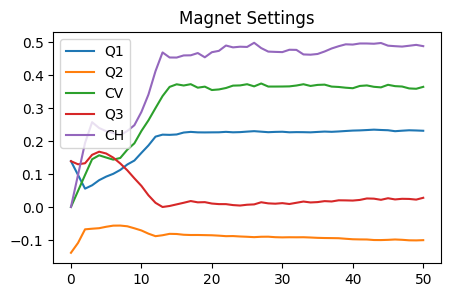

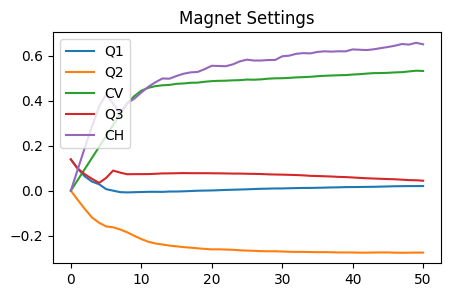

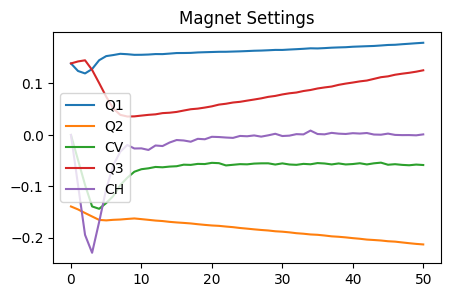

In [ ]:
for episode in rl_real:
    magnets = np.stack([obs["magnets"] for obs in episode["observations"]])
    normalized = magnets / [72, 72, 6.1782e-3, 72, 6.1782e-3]

    plt.figure(figsize=(5, 3))
    plt.title("Magnet Settings")
    plt.plot(normalized[:, 0], label="Q1")
    plt.plot(normalized[:, 1], label="Q2")
    plt.plot(normalized[:, 2], label="CV")
    plt.plot(normalized[:, 3], label="Q3")
    plt.plot(normalized[:, 4], label="CH")
    plt.legend()
    plt.show()


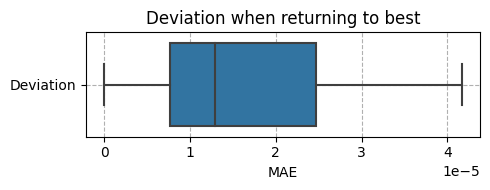

In [4]:
bo_real.plot_best_return_deviation_box()

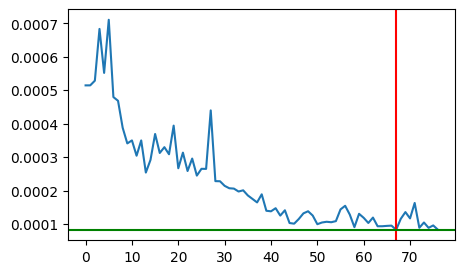

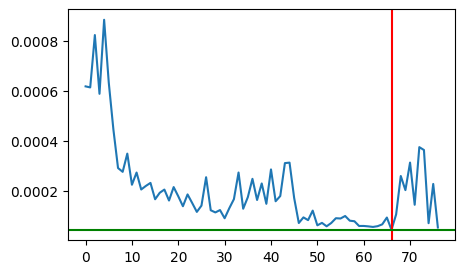

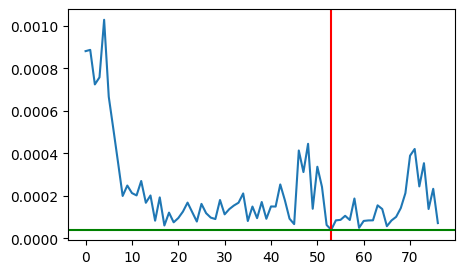

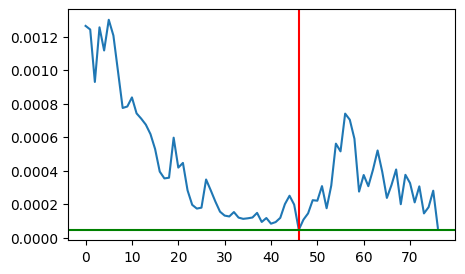

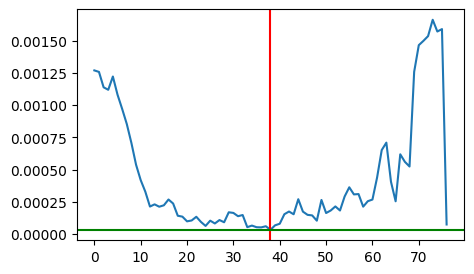

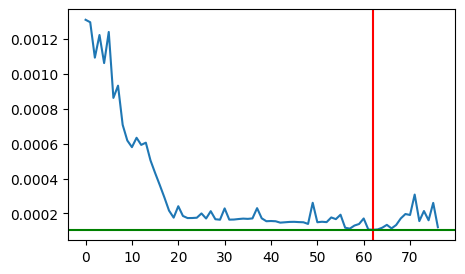

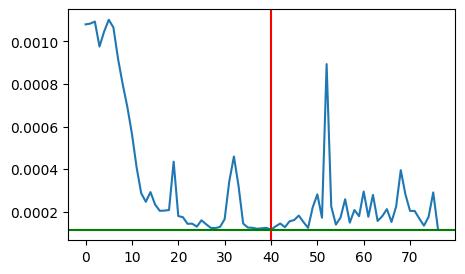

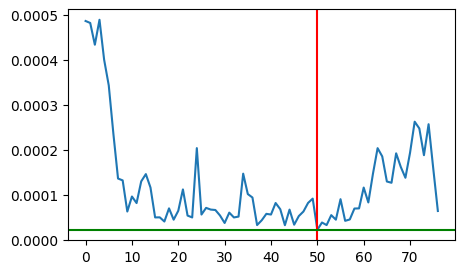

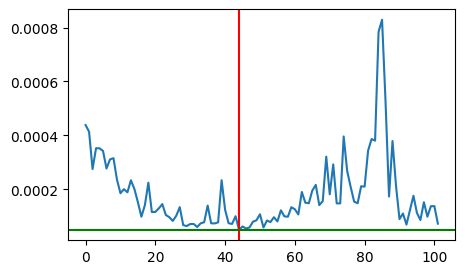

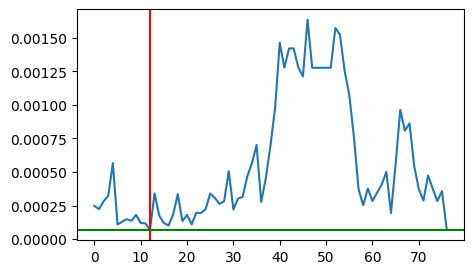

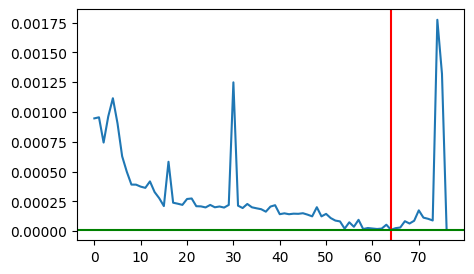

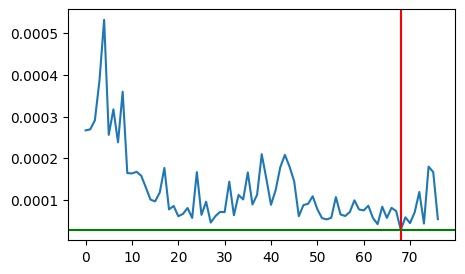

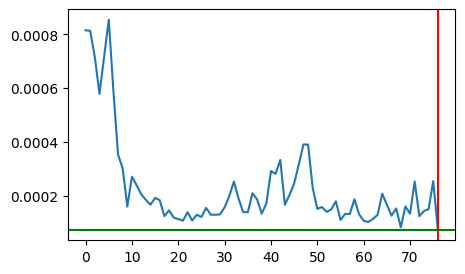

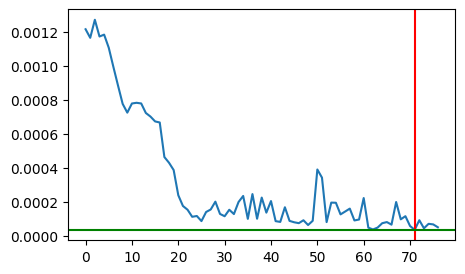

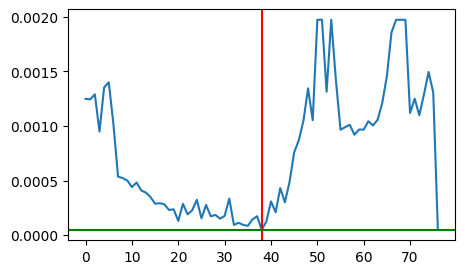

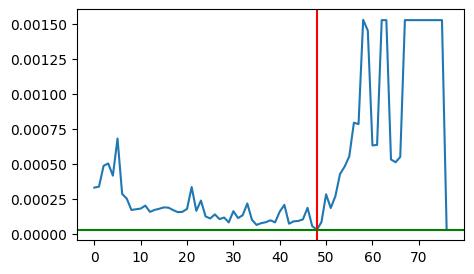

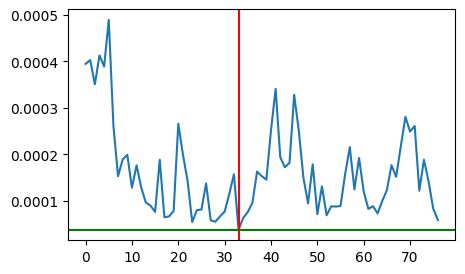

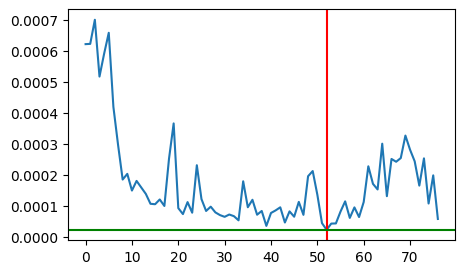

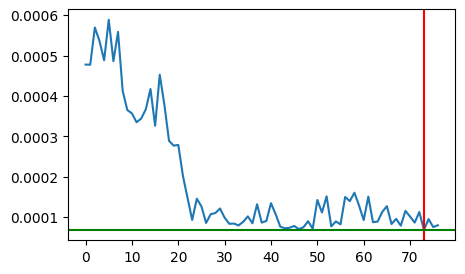

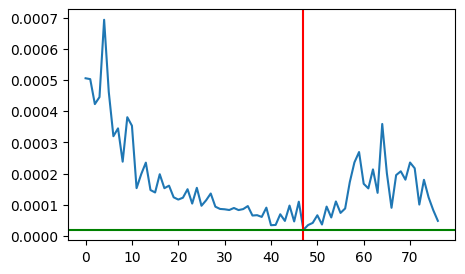

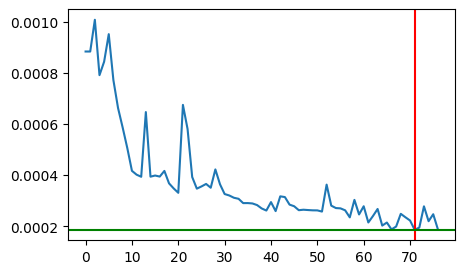

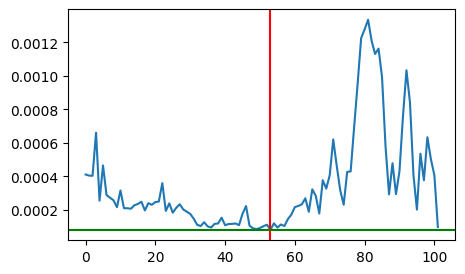

In [4]:
for episode in bo_real.episodes:
    episode.plot_best_return_deviation_example()

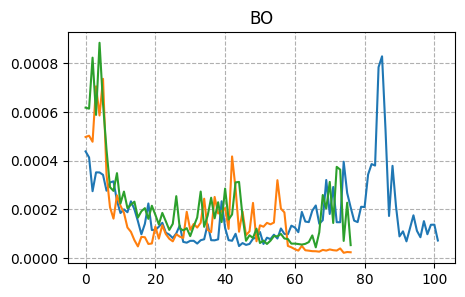

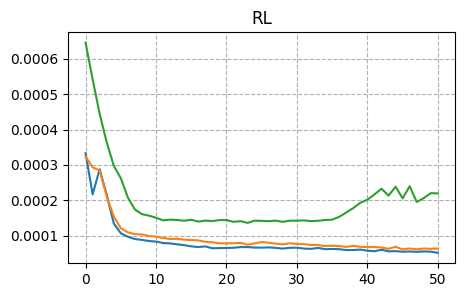

In [31]:
import matplotlib.pyplot as plt

bo_zeros = [
    "202209291424_problem_000",
    "202210181419_problemx_000",
    "202211101314_problemx_000",
]
bo_zeros = [f"data/bo_vs_rl/real/bo/{d}/recorded_episode_1.pkl" for d in bo_zeros]
bo_zeros = [load_episode_data(path) for path in bo_zeros]

maes = [get_maes(episode) for episode in bo_zeros]

plt.figure(figsize=(5, 3))
for episode in maes:
    plt.plot(episode)
plt.title("BO")
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.show()

rl_zeros = [
    "202209291443_problem_000",
    "202210181433_problemx_000",
    "202211101329_problem_000",
]
rl_zeros = [f"data/bo_vs_rl/real/rl/{d}/recorded_episode_1.pkl" for d in rl_zeros]
rl_zeros = [load_episode_data(path) for path in rl_zeros]

maes = [get_maes(episode) for episode in rl_zeros]

plt.figure(figsize=(5, 3))
for episode in maes:
    plt.plot(episode)
plt.title("RL")
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.show()


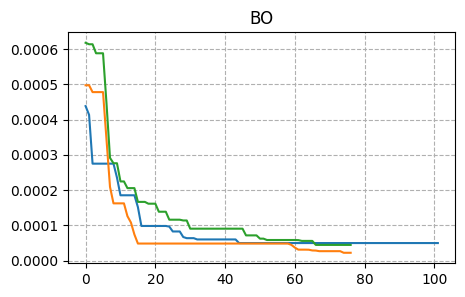

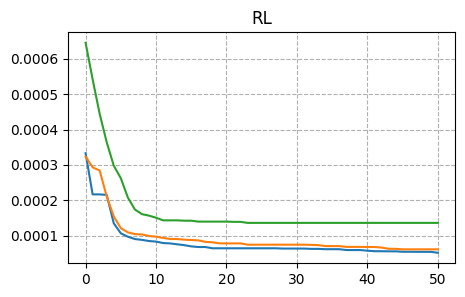

In [32]:
import matplotlib.pyplot as plt

bo_zeros = [
    "202209291424_problem_000",
    "202210181419_problemx_000",
    "202211101314_problemx_000",
]
bo_zeros = [f"data/bo_vs_rl/real/bo/{d}/recorded_episode_1.pkl" for d in bo_zeros]
bo_zeros = [load_episode_data(path) for path in bo_zeros]

maes = [get_maes(episode) for episode in bo_zeros]
min_maes = [compute_min_maes(episode) for episode in maes]

plt.figure(figsize=(5, 3))
for episode in min_maes:
    plt.plot(episode)
plt.title("BO")
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.show()

rl_zeros = [
    "202209291443_problem_000",
    "202210181433_problemx_000",
    "202211101329_problem_000",
]
rl_zeros = [f"data/bo_vs_rl/real/rl/{d}/recorded_episode_1.pkl" for d in rl_zeros]
rl_zeros = [load_episode_data(path) for path in rl_zeros]

maes = [get_maes(episode) for episode in rl_zeros]
min_maes = [compute_min_maes(episode) for episode in maes]

plt.figure(figsize=(5, 3))
for episode in min_maes:
    plt.plot(episode)
plt.title("RL")
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.show()


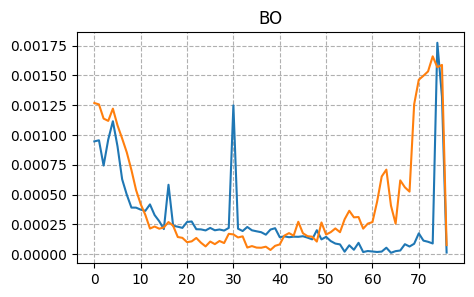

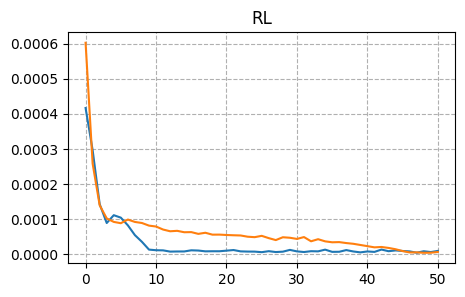

In [35]:
import matplotlib.pyplot as plt

bo_33s = ["202210181626_problem_033", "202211101452_problemx_033"]
bo_33s = [f"data/bo_vs_rl/real/bo/{d}/recorded_episode_1.pkl" for d in bo_33s]
bo_33s = [load_episode_data(path) for path in bo_33s]

maes = [get_maes(episode) for episode in bo_33s]

plt.figure(figsize=(5, 3))
for episode in maes:
    plt.plot(episode)
plt.title("BO")
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.show()

rl_33s = ["202210181640_problem_033", "202211101507_problemx_033"]
rl_33s = [f"data/bo_vs_rl/real/rl/{d}/recorded_episode_1.pkl" for d in rl_33s]
rl_33s = [load_episode_data(path) for path in rl_33s]

maes = [get_maes(episode) for episode in rl_33s]

plt.figure(figsize=(5, 3))
for episode in maes:
    plt.plot(episode)
plt.title("RL")
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.show()


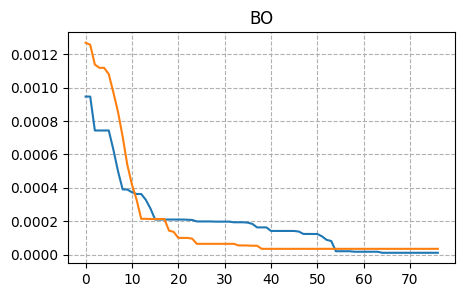

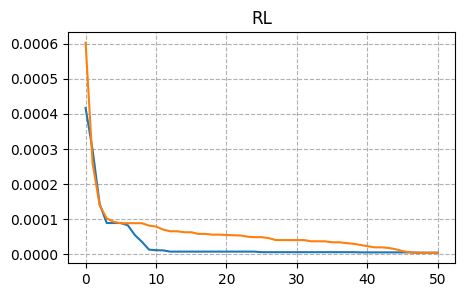

In [36]:
import matplotlib.pyplot as plt

bo_33s = ["202210181626_problem_033", "202211101452_problemx_033"]
bo_33s = [f"data/bo_vs_rl/real/bo/{d}/recorded_episode_1.pkl" for d in bo_33s]
bo_33s = [load_episode_data(path) for path in bo_33s]

maes = [get_maes(episode) for episode in bo_33s]
min_maes = [compute_min_maes(episode) for episode in maes]

plt.figure(figsize=(5, 3))
for episode in min_maes:
    plt.plot(episode)
plt.title("BO")
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.show()

rl_33s = ["202210181640_problem_033", "202211101507_problemx_033"]
rl_33s = [f"data/bo_vs_rl/real/rl/{d}/recorded_episode_1.pkl" for d in rl_33s]
rl_33s = [load_episode_data(path) for path in rl_33s]

maes = [get_maes(episode) for episode in rl_33s]
min_maes = [compute_min_maes(episode) for episode in maes]

plt.figure(figsize=(5, 3))
for episode in min_maes:
    plt.plot(episode)
plt.title("RL")
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.show()
